In [21]:
# import standard libs
import pandas as pd
import numpy as np
import json

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# machine learning libs
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# importing the sys module
import sys        
 
# appending the directory of preprocess_text.py
# in the sys.path list
sys.path.append('D:\JDS\sentiment_predictors\src')       
 
# now we can import module
from preprocess_text import preprocess_text   

# Data Inspection and Formatting

In [3]:
# Load data
df1 = pd.read_csv('../data/dataset_damianusdeni_2014_presidential_election.csv', encoding='iso-8859-1')
df2 = pd.read_csv('../data/dataset_damianusdeni_ecommerce_review.csv', sep=',', names=['review', 'sentiment', 'nan1', 'nan2', 'nan3'])
df3 = pd.read_csv('../data/dataset_indonlu_train_preprocess.tsv', sep='\t', names=['text', 'sentiment'])
df4 = pd.read_csv('../data/dataset_indonlu_valid_preprocess.tsv', sep='\t', names=['text', 'sentiment'])
df5 = pd.read_csv('../data/dataset_researchgate_Indonesian Sentiment Twitter Dataset Labeled.csv', sep='\t', encoding='utf-8')
df6 = pd.read_csv('../data/dataset_rizalespe_komentar_instagram_cyberbullying.csv', encoding='utf-8')
df7 = pd.read_csv('../data/dataset_rizalespe_master_emoji.csv', encoding='utf-8')
df8 = pd.read_csv('../data/dataset_rizalespe_tweet_sentimen_tayangan_tv.csv', encoding='utf-8')
df9 = pd.read_csv('../data/dataset_rizalespe_tweet_sentiment_cellular_service_provider.csv', encoding='utf-8')
df10 = pd.read_csv('../data/dataset_rizalespe_tweet_sentiment_opini_film.csv', encoding='utf-8')
df11 = pd.read_csv('../data/dataset_rizalespe_tweet_sentiment_pilkada_DKI_2017.csv', encoding='utf-8')
df12 = pd.read_excel('../data/ramaprakoso_sentiment_keywords.xlsx')
df13 = pd.read_csv('../data/dataset_absa_review_hotel_priority_3k_labelled.csv')
df14 = pd.read_excel('../data/dataset_emprit_vaksin_jabar.xlsx')
df15 = pd.read_excel('../data/dataset_pos_neg.xlsx')

In [4]:
# Function for printing df name
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

# Display the data
all_df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]

for i in all_df:
    print(get_df_name(i))
    display(i.head())
    print(f'Data shape: {len(i)}')
    print('\n \n')

df1


,ID,Tweet_ID,Isi_Tweet,Tanggal_Tweet,Kandidat,Aplikasi,Lokasi User,Sentimen
0,133343972,patih_patria,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,8/1/2013 0:33,Jokowi,web,BLITAR - INDONESIA,1
1,921720487,RintisBautista,"capres jokowi,wacapres abraham samad. gubernur...",8/1/2013 4:11,Jokowi,"<a href=""http://janetter.net/"" rel=""nofollow"">...",Didalam hatinya recha :love,1
2,-2120434840,JokowiPres,"RT @RintisBautista: capres jokowi,wacapres abr...",8/1/2013 4:32,Jokowi,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1
3,-116006035,Franliiiii,capres ( Prabowo ) and cawapres ( jokowi ) and...,8/1/2013 7:33,Prabowo,web,Manado,1
4,-906300614,JokowiPres,RT @Franliiiii: capres ( Prabowo ) and cawapre...,8/1/2013 7:36,Prabowo,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1


Data shape: 3356

 

df2


,review,sentiment,nan1,nan2,nan3
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1,NaN,NaN,NaN
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1,NaN,NaN,NaN
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1,NaN,NaN,NaN
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1,NaN,NaN,NaN
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1,NaN,NaN,NaN


Data shape: 3144

 

df3


,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


Data shape: 11000

 

df4


,text,sentiment
0,"meski masa kampanye sudah selesai , bukan bera...",neutral
1,tidak enak,negative
2,restoran ini menawarkan makanan sunda . kami m...,positive
3,lokasi di alun alun masakan padang ini cukup t...,positive
4,betapa bejad kader gerindra yang anggota dprd ...,negative


Data shape: 1260

 

df5


,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
2,1,doa rezeki tak putus inna haa zaa larizquna ma...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...
4,-1,aku tak faham betul jenis orang malaysia yang ...


Data shape: 10806

 

df6


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


Data shape: 400

 

df7


,ID,Emoji,Sentiment,Makna Emoji,Special Tag
0,1,😛,negative,Face With Stuck-Out Tongue,<FACE WITH STUCK-OUT TOUNGES>
1,2,😠,negative,Angry Face,<Angry Face>
2,3,💣,negative,Bomb,<Bomb>
3,4,💔,negative,Broken Heart,<Broken Heart>
4,5,😕,negative,Confused Face,<Confused Face>


Data shape: 165

 

df8


,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


Data shape: 400

 

df9


,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


Data shape: 300

 

df10


,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


Data shape: 200

 

df11


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


Data shape: 900

 

df12


,keyword,sentiment
0,acak-acakan,-1
1,adu,-1
2,adu domba,-1
3,aib,-1
4,akal bulus,-1


Data shape: 4816

 

df13


,review,category_sentiment,category,sentiment
0,Kotor berdebu. Saya tdk berhenti bersin ketika...,wifi_P1-neg,wifi_P1,neg
1,Kotor berdebu. Saya tdk berhenti bersin ketika...,kebersihan-neg,kebersihan,neg
2,kamar ada semutnya. kamar mandi bermasalah. bu...,kebersihan-neg,kebersihan,neg
3,"Kamar mandi bau, airnya bau",bau_P1-neg,bau_P1,neg
4,"tak sesuai espektasi, kamar sempit, pintu kama...",service-neg,service,neg


Data shape: 5632

 

df14


,No,Type,Mentions,Date,Link,Media,Sentiment,Author,Followers,Comments,Likes,Shares,Retweeted,Replied,Favourited
0,1,mention,"Kapolri JenderalDrs. Listyo Sigit Prabowo, htt...",2021-08-06 13:32:01,https://twitter.com/web/statuses/1423532292857...,Twitter,Positive,@PolsekKotaBanj1 (Polsek Kota Banjar),1,0,0,0,0,0,0
1,2,rt,RT Polres Majalengka Polda Jabar akan terus me...,2021-08-06 13:31:36,https://twitter.com/web/statuses/1423532191116...,Twitter,Positive,@Tri49668146 (Kabar_Segar),3,0,0,0,0,0,0
2,3,mention,Pemerintah bakal mengerahkan 15.000 vaksin bag...,2021-08-06 13:29:04,https://twitter.com/web/statuses/1423531552735...,Twitter,Positive,@HPondokgede (HumasPolsek Pondokgede),34,0,0,0,0,0,0
3,4,mention,"Kapolri JenderalDrs. Listyo Sigit Prabowo, htt...",2021-08-06 13:27:40,https://twitter.com/web/statuses/1423531200979...,Twitter,Positive,@PolsekMijen1 (Polsek Mijen),5,0,0,0,0,0,0
4,5,mention,Polres Majalengka Polda Jabar akan terus mengg...,2021-08-06 13:26:04,https://twitter.com/web/statuses/1423530794711...,Twitter,Positive,@PolsekLembursi1 (Polsek Lembursitu),28,0,0,0,0,0,0


Data shape: 5000

 

df15


,text,Sentiment
0,inkonsisten,-1.0
1,porno,-1.0
2,teroris,-1.0
3,sesat,-1.0
4,tuntut,-1.0


Data shape: 14909

 



In [5]:
# Rename column
df1 = df1.rename(columns={"Sentimen":"Sentiment"})
df2 = df2.rename(columns={"sentiment":"Sentiment"})
df3 = df4.rename(columns={"sentiment":"Sentiment"})
df4 = df4.rename(columns={"sentiment":"Sentiment"})
df5 = df5.rename(columns={"sentimen":"Sentiment"})
df12 = df12.rename(columns={"sentiment":"Sentiment"})
df13 = df13.rename(columns={"sentiment":"Sentiment"})

In [6]:
# Change positive, negative, and neutral to 1, -1, 0
replace_sentiment = {'positive': 1, 'neutral': 0, 'negative': -1}
replace_sentiment2 = {'pos': 1, 'neu': 0, 'neg': -1}
replace_sentiment3 = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

df3['Sentiment'].replace(replace_sentiment, inplace=True)
df4['Sentiment'].replace(replace_sentiment, inplace=True)
df6['Sentiment'].replace(replace_sentiment, inplace=True)
df7['Sentiment'].replace(replace_sentiment, inplace=True)
df8['Sentiment'].replace(replace_sentiment, inplace=True)
df9['Sentiment'].replace(replace_sentiment, inplace=True)
df10['Sentiment'].replace(replace_sentiment, inplace=True)
df11['Sentiment'].replace(replace_sentiment, inplace=True)
df13['Sentiment'].replace(replace_sentiment2, inplace=True)
df14['Sentiment'].replace(replace_sentiment3, inplace=True)

# Select only tweet/text and sentiment column
df1 = df1[['Isi_Tweet','Sentiment']]
df2 = df2[['review','Sentiment']]
df5 = df5[['Tweet','Sentiment']]
df6 = df6[['Instagram Comment Text','Sentiment']]
df7 = df7[['Makna Emoji','Sentiment']]
df8 = df8[['Text Tweet','Sentiment']]
df9 = df9[['Text Tweet','Sentiment']]
df10 = df10[['Text Tweet','Sentiment']]
df11 = df11[['Text Tweet','Sentiment']]
df13 = df13[['review','Sentiment']]
df14 = df14[['Mentions','Sentiment']]

In [7]:
# Print variable name changes
all_df =  [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]

print('BEFORE CHANGING COLUMNS NAME:')
for i in all_df:
    print(i.columns)
for i in all_df:
    i.columns = ['text', 'sentiment']

print('\nAFTER:')
for i in all_df:
    print(i.columns)

BEFORE CHANGING COLUMNS NAME:
Index(['Isi_Tweet', 'Sentiment'], dtype='object')
Index(['review', 'Sentiment'], dtype='object')
Index(['text', 'Sentiment'], dtype='object')
Index(['text', 'Sentiment'], dtype='object')
Index(['Tweet', 'Sentiment'], dtype='object')
Index(['Instagram Comment Text', 'Sentiment'], dtype='object')
Index(['Makna Emoji', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['keyword', 'Sentiment'], dtype='object')
Index(['review', 'Sentiment'], dtype='object')
Index(['Mentions', 'Sentiment'], dtype='object')
Index(['text', 'Sentiment'], dtype='object')

AFTER:
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='objec

In [8]:
# Concat all data
df = pd.concat(all_df, ignore_index=True)

In [9]:
print(len(df))
display(df.sample(10))
df.sentiment.value_counts().iloc[:]

52548


,text,sentiment
39359,kepongahan,-1.0
34495,Ilustrasi vaksin COVID-19. (ANTARA/HO-Humas Ke...,0.0
48233,dilunasi,1.0
5420,@raisa6690 @eleveniaid semoga kepilihðŸ™,0.0
20737,Selalu dan masih terinspirasi dengan cinta BJH...,1.0
46464,menggemparkan,-1.0
46631,meraup,-1.0
42920,kegentingan,-1.0
11688,rh ceritanya jaemin lagi persiapan mau pentas ...,0.0
38625,dipungut uang,-1.0


-1.0    24697
 1.0    17254
 0.0    10595
Name: sentiment, dtype: int64

# Preprocessing

## Handling Null

In [10]:
# Check null
df.isna().sum()

text         2
sentiment    2
dtype: int64

In [11]:
# Drop null
df.dropna(inplace=True)
df.isna().sum()

text         0
sentiment    0
dtype: int64

## Handling Duplicates

In [12]:
# Drop duplicates
print('Before drop duplicates')
print("Total data:", len(df))
print("Unique data:", df.text.nunique())

df.drop_duplicates(['text'], inplace=True)
print('\nAfter drop duplicates')
print("Total data:", len(df))
print("Unique data:", df.text.nunique())

Before drop duplicates
Total data: 52546
Unique data: 32432

After drop duplicates
Total data: 32432
Unique data: 32432


## Text Preprocessing

In [13]:
# Apply preprocessing function
df_preprocessed = df.copy()
df_preprocessed['cleaned'] = df_preprocessed['text'].apply(lambda x: preprocess_text(x, 
                                                                                    remove_stopwords=True, 
                                                                                    stem=False))

In [14]:
df_preprocessed

,text,sentiment,cleaned
0,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,1.0,fahrelstv tidak setuju jokowi cawapres capres ...
1,"capres jokowi,wacapres abraham samad. gubernur...",1.0,capres jokowi wacapres abraham samad gubernur ...
2,"RT @RintisBautista: capres jokowi,wacapres abr...",1.0,rt rintisbautista capres jokowi wacapres abrah...
3,capres ( Prabowo ) and cawapres ( jokowi ) and...,1.0,capres prabowo cawapres jokowi gubdki ahok man...
4,RT @Franliiiii: capres ( Prabowo ) and cawapre...,1.0,rt franliiiii capres prabowo cawapres jokowi g...
...,...,...,...
52468,berbual,-1.0,berbual
52480,mengumalkan,-1.0,mengumalkan
52516,bertakhyul,-1.0,bertakhyul
52538,binal,-1.0,binal


## Handle Empty and Duplicates Data (After Text Preprocessing)

In [15]:
print('Before drop duplicates')
print("Total data:", len(df_preprocessed))
print("Unique data:", df_preprocessed['cleaned'].nunique())

df_preprocessed.drop_duplicates(['cleaned'], inplace=True)

print('\nAfter drop duplicates')
print("Total data:", len(df_preprocessed))
print("Unique data:", df_preprocessed['cleaned'].nunique())

Before drop duplicates
Total data: 32432
Unique data: 30642

After drop duplicates
Total data: 30642
Unique data: 30642


# EDA

## Sentences Length

In [16]:
# Create new variables that contains sentences length
df_EDA = df_preprocessed.copy()
df_EDA['words_frequency'] = df_EDA['cleaned'].apply(lambda x: len(str(x).split()))
df_EDA.sample(3)

,text,sentiment,cleaned,words_frequency
34927,Duh! Kekosongan Vaksin di Cianjur Sudah Terjad...,1.0,duh kekosongan vaksin cianjur pekan jabarnews ...,17
14599,ketibaan pemain2 man utd di training centre me...,0.0,ketibaan pemain man utd training centre masam ...,9
31931,"tampilan luar boleh biasa tapi kamarnya luas, ...",1.0,tampilan kamarnya luas bed empuk fasilitas len...,24


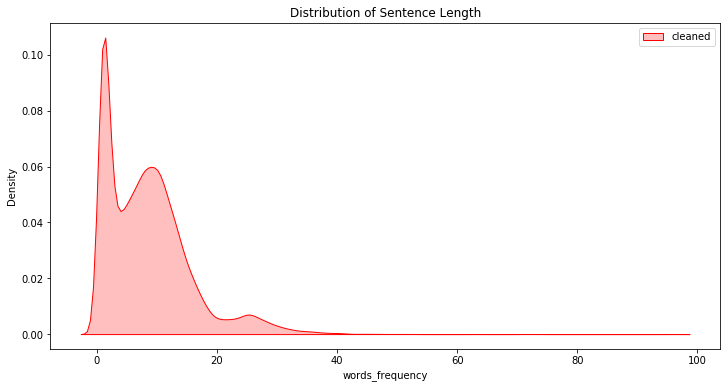

In [17]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Sentence Length')
p1=sns.kdeplot(df_EDA['words_frequency'], shade=True, color="r")
plt.legend(labels=['cleaned'])

plt.show()

## Sentiment Distribution

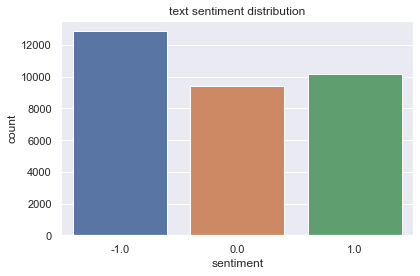

,sentiment,cleaned,percentage
0,-1.0,12445,40.61
2,1.0,9280,30.29
1,0.0,8917,29.10


total data:  32432


In [18]:
# barchart
sns.set(style='darkgrid')

sns.countplot(x=df.sentiment)
plt.title('text sentiment distribution')

plt.tight_layout()
plt.show()

# dataframe
temp = df_EDA.groupby('sentiment').count()['cleaned'].reset_index().sort_values(by='cleaned', ascending=False)
temp['percentage'] = list(round(df_EDA['sentiment'].value_counts(normalize=True) * 100, 2))
display(temp)
print('total data: ', len(df))

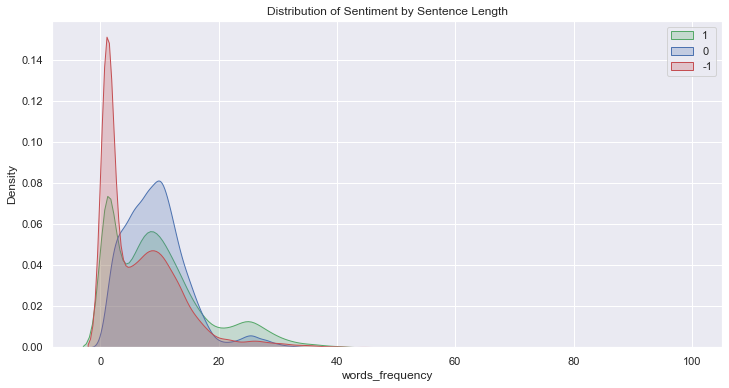

In [19]:
# Plot Sentiment Distribution by Sentence Length
plt.figure(figsize=(12,6))
plt.title('Distribution of Sentiment by Sentence Length')

p1=sns.kdeplot(df_EDA[df_EDA['sentiment']== 1]['words_frequency'], shade=True, color="g")
p1=sns.kdeplot(df_EDA[df_EDA['sentiment']== 0]['words_frequency'], shade=True, color="b")
p1=sns.kdeplot(df_EDA[df_EDA['sentiment']== -1]['words_frequency'], shade=True, color="r")

plt.legend(labels=[1, 0, -1])
plt.show()

## Words frequency

In [27]:
# Create funcion for ...
def vocab(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    vocabulary = {'word': check.index, 'freq': check.values}
    vocabulary = pd.DataFrame(vocabulary)
    vocabulary.index = vocabulary['word']
    vocabulary.drop('word', axis=1, inplace=True)
    vocabulary.sort_values('freq', ascending=True, inplace=True)
    
    return vocabulary

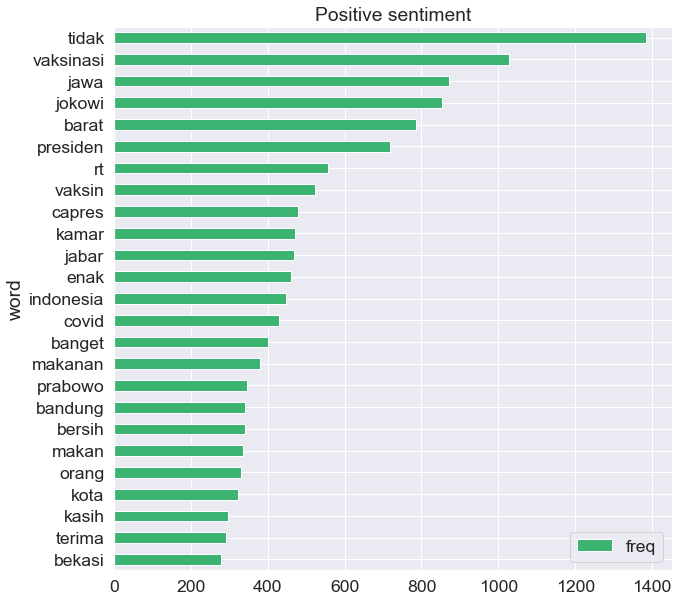

In [28]:
# Plot top 25 words of POSITIVE SENTIMENT
vocabulary_cleaned = vocab(df_EDA[df_EDA['sentiment'] == 1]['cleaned'])
sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[-25:].plot(kind='barh', figsize=(10,10), color='mediumseagreen')
plt.title('Positive sentiment')
plt.show()

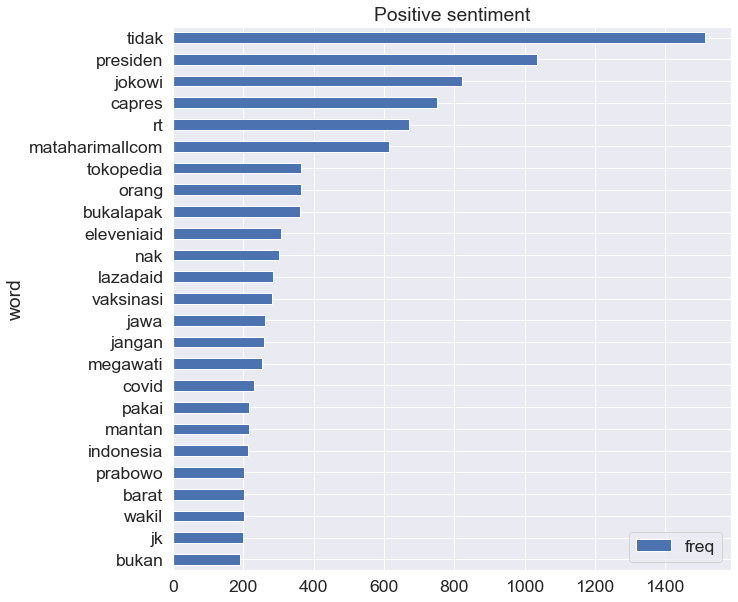

In [30]:
# Plot top 25 words of NEUTRAL SENTIMENT
vocabulary_cleaned = vocab(df_EDA[df_EDA['sentiment'] == 0]['cleaned'])
sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[-25:].plot(kind='barh', figsize=(10,10))
plt.title('Nautral sentiment')
plt.show()

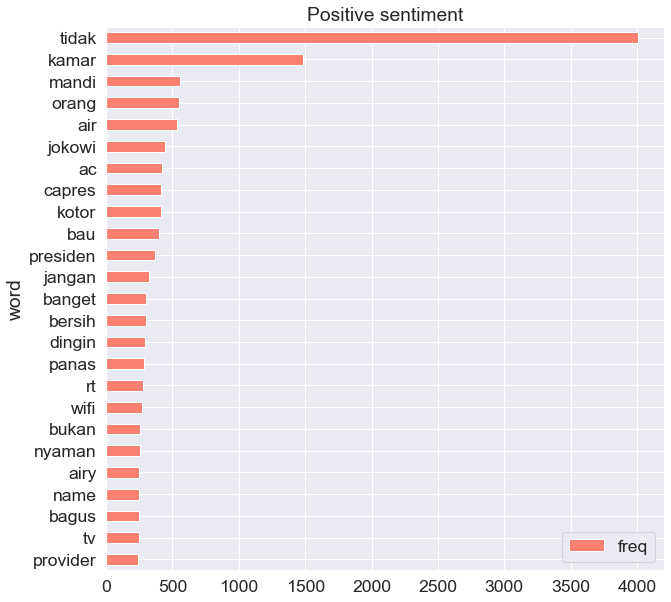

In [31]:
# Plot top 25 words of NEGATIVE SENTIMENT
vocabulary_cleaned = vocab(df_EDA[df_EDA['sentiment'] == -1]['cleaned'])
sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[-25:].plot(kind='barh', figsize=(10,10), color='salmon')
plt.title('Negative sentiment')
plt.show()